### Cardiovascular Disease Dataset
link: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

There are 3 types of input features:

* Objective: factual information
* Examination: results of medical examination
* Subjective: information given by the patient

#### Features
* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

###### All of the dataset values were collected at the moment of medical examination.

### Understanding of the problem

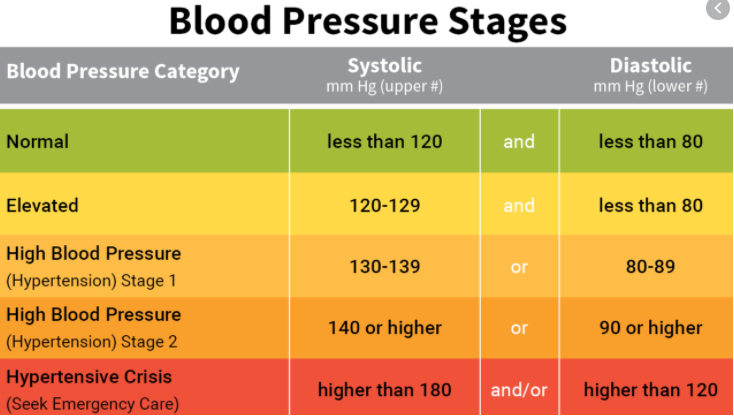

Key definitions:
* Systolic blood pressure - pressure exerted when blood is ejected into arteries. Normal systolic blood pressure is 120 mmHg or below

* Diastolic blood pressure - pressure blood exerts within arteries between heartbeats. Normal diastolic blood pressure is 80 mmHg or below

* High blood pressure = hypertension

* Primary hypertension - no known cause for high blood pressure and is the most common type of hypertension. Usually takes years to develop and is probably caused by a lifestyle, environment and how the body changes with age.

* Secondary hypertension - when a health problem or medicine is causing high blood pressure. Might be a result of kidney problems, sleep apnea, some medicines, thyroid or adrenal gland problems.

##### Over the years, research has found that both numbers are equally important in monitoring heart health. 
However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.

##### High blood pressure (hypertension) is caused by:
* diet high in salt and/or cholesterol
* tobacco or drinking too much alcohol
* stress
* being overweight or obese
* older age (likelihood of high blood pressure increases with age)
* lack of physical activity
* chronic conditions - e.g. kidney and hormone problems, diabetes and high cholesterol
* family history (e.g. parents or close relatives with high blood pressure)
* insufficient intake of potassium, calcium, magnesium

##### Uncontrolled high blood pressure can lead to following complications:
* heart attack or stroke
* aneurysm
* heart failure
* weakened and narrowed blood vessels in your kidneys
* thickened, narrowed or torn blood vessels in the eyes
* metabolic syndrome
* trouble with memory or understanding
* dementia

### Objective: examine how following factors affect heart problems

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import os
file_name='eda_updated.csv'
file_path = os.path.join(os.path.abspath(""), "PYTHON", file_name)
df = pd.read_csv(file_name,delimiter=',')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0,21.967120
1,1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1,34.927679
2,2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1,23.507805
3,3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1,28.710479
4,4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0,23.011177


In [10]:
#displaying last 5 rows
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
69530,99993,52.712329,2,168,76.0,120.0,80.0,1,1,1,0,1,0,26.927438
69531,99995,61.920548,1,158,126.0,140.0,90.0,2,2,0,0,1,1,50.472681
69532,99996,52.235616,2,183,105.0,180.0,90.0,3,1,0,1,0,1,31.353579
69533,99998,61.454795,1,163,72.0,135.0,80.0,1,2,0,0,0,1,27.099251
69534,99999,56.273973,1,170,72.0,120.0,80.0,2,1,0,0,1,0,24.913495


In [11]:
#how many rows and columns are in the dataset?
df.shape

(69535, 14)

In [12]:
#checking for number of unique values
df.nunique()

id             69535
age             8071
gender             2
height            72
weight           261
ap_hi            121
ap_lo            109
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
bmi             3690
dtype: int64

In [7]:
#unique values in "cholesterol" column
#data['cholesterol'].unique()

In [13]:
#what columns are in the dataset?
column_names = df.columns
column_names

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

In [14]:
#key characteristics of variables
df.describe().round(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.0,69535.0,69535.00
mean,49978.37,53.35,1.35,164.44,74.20,127.03,81.69,1.37,1.23,0.09,0.05,0.8,0.5,27.47
std,28850.69,6.76,0.48,7.86,14.25,17.07,9.84,0.68,0.57,0.28,0.23,0.4,0.5,5.18
min,0.00,29.58,1.00,125.00,35.45,70.00,52.00,1.00,1.00,0.00,0.00,0.0,0.0,15.04
25%,25013.50,48.41,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,23.88
50%,50007.00,53.98,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,26.37
75%,74896.50,58.43,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0,30.12
max,99999.00,64.97,2.00,207.00,200.00,240.00,180.00,3.00,3.00,1.00,1.00,1.0,1.0,59.52


###### Some bugs detected in the dataset:
* age in days, not in years
* minimum wage of weight (10) seems as too low
* both ap_hi and ap_lo should not bring any negative values
* max values of both ap_hi and ap_lo need adjustment

In [15]:
#changing age to 'years' instead of 'days'
df['age'] = df['age']/365
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,0.138060,2,168,62.0,110.0,80.0,1,1,0,0,1,0,21.967120
1,1,0.151833,1,156,85.0,140.0,90.0,3,1,0,0,1,1,34.927679
2,2,0.141543,1,165,64.0,130.0,70.0,3,1,0,0,0,1,23.507805
3,3,0.132280,2,169,82.0,150.0,100.0,1,1,0,0,1,1,28.710479
4,4,0.131162,1,156,56.0,100.0,60.0,1,1,0,0,0,0,23.011177


In [16]:
df.describe().round(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.0,69535.0,69535.00
mean,49978.37,0.15,1.35,164.44,74.20,127.03,81.69,1.37,1.23,0.09,0.05,0.8,0.5,27.47
std,28850.69,0.02,0.48,7.86,14.25,17.07,9.84,0.68,0.57,0.28,0.23,0.4,0.5,5.18
min,0.00,0.08,1.00,125.00,35.45,70.00,52.00,1.00,1.00,0.00,0.00,0.0,0.0,15.04
25%,25013.50,0.13,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,23.88
50%,50007.00,0.15,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,26.37
75%,74896.50,0.16,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0,30.12
max,99999.00,0.18,2.00,207.00,200.00,240.00,180.00,3.00,3.00,1.00,1.00,1.0,1.0,59.52


In [12]:
#bmi = df['weight'] / ((df['height']/100)**2)
#df['bmi'] = bmi
#df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


### Cleaning the dataset

In [17]:
#checking for null values across dataset
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [18]:
#checking for NaN values
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [15]:
#checking for "strange" looking data
strange_aphi = data[(data['ap_hi']>250)].sort_values(by='ap_hi',ascending=False)
strange_aphi

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
58374,47.775342,1,169,70.0,16020,80,1,1,0,0,0,1,24.508946
36414,58.523288,1,169,71.0,14020,80,3,3,0,0,1,1,24.859074
66998,46.328767,2,180,78.0,14020,90,1,1,0,0,1,1,24.074074
67502,54.057534,1,160,65.0,14020,90,1,1,0,0,1,0,25.390625
36339,43.383562,2,169,75.0,14020,80,2,1,0,0,1,1,26.259585
79116,50.156164,1,152,76.0,13010,80,2,2,0,0,1,1,32.894737
79679,63.512329,1,161,105.0,13010,80,1,1,0,0,0,0,40.507696
11089,57.621918,1,175,80.0,11500,90,1,1,0,0,1,1,26.122449
73356,51.463014,2,168,65.0,11020,80,1,1,0,0,1,1,23.030045


In [16]:
#checking for "strange" looking data
strange_aplo = data[(data['ap_lo']>250)].sort_values(by='ap_lo',ascending=False)
strange_aplo.head(60)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
61901,63.619178,1,160,105.0,200,11000,1,1,0,0,1,1,41.015625
34098,49.594521,2,169,86.0,150,10000,2,2,0,1,1,1,30.110991
97907,52.224658,1,166,70.0,160,10000,2,1,0,0,1,1,25.402816
3352,57.517808,2,186,105.0,140,10000,1,1,0,0,1,1,30.350330
62058,60.016438,2,179,62.0,130,9800,1,1,0,0,1,0,19.350208
9482,53.501370,1,162,69.0,130,9100,1,1,0,0,1,1,26.291724
47030,50.232877,1,156,65.0,150,9011,2,2,0,0,1,1,26.709402
17260,58.810959,2,169,78.0,130,9011,1,1,1,1,1,1,27.309968
22832,39.747945,2,179,70.0,120,8500,1,1,0,0,1,0,21.847009


In [ ]:
# adjustment of the possible wrong value of ap_hi and ap_lo (divided by 10 or 100)
# def ap_correction(ap_value):
#     if ap_value > 2000: return ap_value/100
#     elif (ap_value > 300 and ap_value <= 2000): return ap_value/10
#     else: return np.abs(ap_value)
# data['ap_hi'] = data.apply(lambda x: ap_correction(x['ap_hi']),axis=1)
# data['ap_lo'] = data.apply(lambda x: ap_correction(x['ap_lo']),axis=1)

In [17]:
# adjustment of the possible wrong value of ap_hi and ap_lo (divided by 10 or 100)
data.loc[(data['ap_lo']>300) & (data['ap_lo']<=2100),'ap_lo'] = data['ap_lo']/10
data.loc[(data['ap_lo']>2100),'ap_lo'] = data['ap_lo']/100
data.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0,70000.00
mean,53.34,1.35,164.36,74.21,128.82,81.60,1.37,1.23,0.09,0.05,0.8,0.5,27.56
std,6.76,0.48,8.21,14.40,154.01,10.19,0.68,0.57,0.28,0.23,0.4,0.5,6.09
min,29.58,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0,3.47
25%,48.39,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,23.88
50%,53.98,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,26.37
75%,58.43,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0,30.22
max,64.97,2.00,250.00,200.00,16020.00,208.80,3.00,3.00,1.00,1.00,1.0,1.0,298.67


In [18]:
data.loc[(data['ap_hi']>300) & (data['ap_hi']<=2000),'ap_hi'] = data['ap_hi']/10
data.loc[(data['ap_hi']>2000),'ap_hi'] = data['ap_hi']/100
data.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.0,70000.0,70000.00
mean,53.34,1.35,164.36,74.21,126.67,81.60,1.37,1.23,0.09,0.05,0.8,0.5,27.56
std,6.76,0.48,8.21,14.40,18.22,10.19,0.68,0.57,0.28,0.23,0.4,0.5,6.09
min,29.58,1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.0,0.0,3.47
25%,48.39,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,23.88
50%,53.98,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,26.37
75%,58.43,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0,30.22
max,64.97,2.00,250.00,200.00,240.00,208.80,3.00,3.00,1.00,1.00,1.0,1.0,298.67


In [47]:
# #both systolic and diastolic blood pressure should not be negative
# data[data['ap_hi']<0]
# data[data['ap_lo']<0]
# #changing negative values into positive
# data['ap_lo'] = data['ap_lo'].abs()
# data['ap_hi'] = data['ap_hi'].abs()

In [19]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,126.674450,81.600571,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.759594,0.476838,8.210126,14.395757,18.219352,10.193442,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.967123,2.000000,250.000000,200.000000,240.000000,208.800000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [20]:
#both ap_hi and _ap_lo should be larger than 50
data = data.loc[data['ap_lo']>50]
data = data.loc[data['ap_lo']<=180]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69858.000000,69858.000000,69858.000000,69858.000000,69858.000000,69858.00000,69858.000000,69858.000000,69858.000000,69858.000000,69858.000000,69858.000000,69858.000000
mean,53.343873,1.349724,164.365370,74.219839,126.712544,81.68963,1.366887,1.226588,0.088136,0.053781,0.803630,0.499943,27.558812
std,6.758265,0.476886,8.202475,14.390388,18.152977,9.85761,0.680282,0.572478,0.283495,0.225586,0.397254,0.500004,6.075343
min,29.583562,1.000000,55.000000,10.000000,-150.000000,52.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.402740,1.000000,159.000000,65.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.984932,1.000000,165.000000,72.000000,120.000000,80.00000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.395803
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.00000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.967123,2.000000,250.000000,200.000000,240.000000,180.00000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [21]:
#assumption: ap_hi<220 and ap_lo<150
data = data.loc[data['ap_hi']<250]
data = data.loc[data['ap_hi']>50]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000,69676.000000
mean,53.344883,1.349747,164.365922,74.222523,127.023664,81.686964,1.367243,1.226635,0.088251,0.053821,0.803749,0.499928,27.558369
std,6.757638,0.476894,8.191284,14.393103,17.072348,9.844815,0.680625,0.572522,0.283662,0.225665,0.397164,0.500004,6.061624
min,29.583562,1.000000,55.000000,10.000000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.405479,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.986301,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.395803
75%,58.432877,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,64.967123,2.000000,250.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


In [22]:
data = data.loc[data['bmi']>=15]
data = data.loc[data['bmi']<=60]
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69585.000000,69585.000000,69585.000000,69585.000000,69585.000000,69585.000000,69585.000000,69585.000000,69585.000000,69585.000000,69585.000000,69585.000000,69585.000000
mean,53.344153,1.349846,164.411626,74.197685,127.020878,81.685476,1.367292,1.226658,0.088281,0.053819,0.803693,0.499921,27.488784
std,6.757327,0.476924,7.943906,14.250808,17.063758,9.841600,0.680709,0.572557,0.283704,0.225662,0.397206,0.500004,5.225369
min,29.583562,1.000000,100.000000,28.000000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.012197
25%,48.402740,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.387871
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.189591
max,64.967123,2.000000,207.000000,200.000000,240.000000,180.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,60.000000


In [23]:
#assumption: height should be at least 100cm and not excess 230cm
data = data.loc[data['height']>120]
data = data.loc[data['height']<250]
data.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.00,69542.0,69542.0,69542.00
mean,53.34,1.35,164.44,74.20,127.02,81.69,1.37,1.23,0.09,0.05,0.8,0.5,27.47
std,6.76,0.48,7.86,14.25,17.07,9.84,0.68,0.57,0.28,0.23,0.4,0.5,5.18
min,29.58,1.00,125.00,28.00,70.00,52.00,1.00,1.00,0.00,0.00,0.0,0.0,15.01
25%,48.41,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,23.88
50%,53.98,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,26.37
75%,58.43,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0,30.12
max,64.97,2.00,207.00,200.00,240.00,180.00,3.00,3.00,1.00,1.00,1.0,1.0,59.52


In [26]:
#assumption: weight should be at least 35kg
data = data.loc[data['weight']>35]
data.describe().round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.00,69535.0,69535.0,69535.00
mean,53.35,1.35,164.44,74.20,127.03,81.69,1.37,1.23,0.09,0.05,0.8,0.5,27.47
std,6.76,0.48,7.86,14.25,17.07,9.84,0.68,0.57,0.28,0.23,0.4,0.5,5.18
min,29.58,1.00,125.00,35.45,70.00,52.00,1.00,1.00,0.00,0.00,0.0,0.0,15.04
25%,48.41,1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,23.88
50%,53.98,1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.0,0.0,26.37
75%,58.43,2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.0,1.0,30.12
max,64.97,2.00,207.00,200.00,240.00,180.00,3.00,3.00,1.00,1.00,1.0,1.0,59.52


## Summary of key data - highest and lowest values

In [25]:
#the tallest
top_10_height = data.nlargest(10, columns='height')
top_10_height.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
30894,52.20,2,207,78.0,100.0,70.0,1,1,0,1,1,0,18.20
59847,52.57,2,200,100.0,170.0,110.0,2,2,0,0,1,1,25.00
1554,60.70,2,198,68.0,120.0,80.0,1,1,0,0,1,1,17.35
4561,44.03,2,198,61.0,110.0,70.0,1,1,0,0,1,1,15.56
12687,61.64,2,198,79.0,160.0,100.0,1,1,1,0,0,1,20.15
17138,50.02,2,198,102.0,110.0,70.0,1,1,0,0,1,0,26.02
41642,59.76,2,198,90.0,130.0,90.0,1,1,0,0,1,1,22.96
43083,63.76,1,198,85.0,110.0,90.0,1,1,0,0,1,0,21.68
43248,55.84,1,198,89.0,120.0,80.0,1,1,0,0,1,0,22.70


In [156]:
#respective 10 lowest ones
bottom_10_height = data.nsmallest(10, columns='height')
bottom_10_height.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
44459,52.22,2,125,70.0,120.0,70.0,1,1,0,0,1,0,44.80
79014,55.82,2,125,49.0,110.0,70.0,1,1,0,0,1,0,31.36
93216,50.03,2,125,60.0,120.0,80.0,1,1,0,0,0,1,38.40
13942,62.38,2,130,90.0,140.0,90.0,1,1,0,0,1,1,53.25
15101,61.76,1,130,50.0,120.0,80.0,1,1,0,0,1,0,29.59
19194,57.93,1,130,90.0,130.0,90.0,1,1,0,0,1,1,53.25
28756,63.51,1,130,60.0,113.0,67.0,1,1,0,0,1,0,35.50
40770,55.51,1,130,74.0,140.0,90.0,1,1,0,0,0,1,43.79
43305,64.10,1,130,45.0,130.0,80.0,1,1,0,0,1,1,26.63


In [150]:
#the heaviest
top_10_weight = data.nlargest(10, columns='weight')
top_10_weight.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
618,45.93,1,186,200.0,130.0,70.0,1,1,0,0,0,0,57.81
87498,57.37,2,180,183.0,110.0,80.0,3,3,0,1,1,1,56.48
6716,47.17,2,176,180.0,140.0,90.0,1,1,0,0,1,1,58.11
64829,47.72,2,190,180.0,140.0,80.0,2,2,0,0,1,1,49.86
86506,51.99,2,180,180.0,140.0,100.0,3,1,0,0,1,1,55.56
87612,45.52,2,196,180.0,130.0,80.0,3,1,0,0,1,1,46.86
3438,52.52,2,177,177.0,130.0,90.0,1,1,0,0,1,1,56.50
80152,42.54,2,170,171.0,120.0,80.0,1,1,0,0,1,1,59.17
83462,39.81,2,178,170.0,150.0,105.0,1,1,1,0,1,1,53.65


In [157]:
#the lightest
bottom_10_weight = data.nsmallest(10, columns='weight')
bottom_10_weight.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
35972,51.42,1,149,35.45,110.0,70.0,1,1,0,0,1,0,15.97
45814,43.14,1,143,36.00,90.0,60.0,1,1,0,0,1,0,17.60
48322,61.84,1,145,36.00,120.0,80.0,1,1,0,0,1,0,17.12
48985,55.91,1,148,36.00,140.0,80.0,1,1,0,0,1,1,16.44
69417,56.03,1,144,36.00,100.0,70.0,1,1,0,0,1,0,17.36
75927,55.88,1,133,36.00,100.0,60.0,1,1,0,0,0,0,20.35
8226,48.39,1,151,37.00,120.0,80.0,1,1,0,0,1,0,16.23
15182,59.37,1,153,37.00,150.0,80.0,3,3,0,0,1,1,15.81
41919,59.53,1,153,37.00,120.0,80.0,1,1,0,0,1,1,15.81


In [151]:
#with the highest systolic blood pressure
top_10_aphi = data.nlargest(10, columns='ap_hi')
top_10_aphi.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
37198,61.92,1,166,102.0,240.0,130.0,2,1,0,0,1,1,37.02
42394,54.24,2,174,75.0,240.0,120.0,2,1,0,1,1,1,24.77
46495,58.36,2,176,98.0,240.0,110.0,1,1,1,0,1,1,31.64
61041,50.14,2,165,76.0,240.0,100.0,1,1,0,0,1,1,27.92
79903,60.06,2,176,115.0,240.0,110.0,1,1,0,0,1,0,37.13
96686,53.94,2,168,75.0,240.0,140.0,3,1,0,0,1,1,26.57
99019,54.30,1,145,62.0,240.0,130.0,1,1,0,0,0,1,29.49
63928,45.86,1,160,100.0,230.0,120.0,2,1,0,0,1,1,39.06
1863,57.71,2,174,106.0,220.0,120.0,3,3,0,0,1,0,35.01


In [186]:
#with the lowest systolic blood pressure
bottom_10_aphi = data.nsmallest(10, columns='ap_hi')
bottom_10_aphi.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
913,56.05,2,169,68.0,70.0,110.0,1,1,0,0,1,0,23.81
6843,46.49,2,159,68.0,70.0,100.0,1,1,0,0,0,0,26.90
19520,58.35,1,156,72.0,70.0,110.0,3,3,0,0,1,1,29.59
20375,63.95,1,167,77.0,70.0,110.0,1,1,0,0,0,0,27.61
29541,61.99,1,165,61.0,70.0,110.0,1,3,0,0,0,0,22.41
33882,47.88,1,160,60.0,70.0,110.0,1,1,0,0,1,0,23.44
46733,57.89,2,164,70.0,70.0,100.0,1,1,0,0,0,0,26.03
47851,42.07,1,171,69.0,70.0,110.0,1,1,0,1,1,0,23.60
51845,42.47,2,168,68.0,70.0,120.0,1,1,1,0,0,0,24.09


In [187]:
#with the highest diastolic blood pressure
top_10_aplo = data.nlargest(10, columns='ap_lo')
top_10_aplo.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
28449,62.51,1,160,88.0,150.0,180.0,1,1,0,0,0,1,34.37
53070,51.46,2,175,75.0,150.0,180.0,1,1,0,0,0,1,24.49
62861,62.06,2,163,70.0,200.0,180.0,1,1,0,0,0,1,26.35
68825,52.43,1,164,98.0,95.0,180.0,3,3,0,1,1,1,36.44
6769,51.95,1,158,74.0,200.0,170.0,1,1,0,0,1,1,29.64
6992,56.17,1,160,69.0,80.0,170.0,1,1,0,0,1,1,26.95
22180,61.42,1,152,65.0,95.0,170.0,1,1,0,1,1,1,28.13
37746,41.88,1,176,81.0,110.0,170.0,1,2,0,0,1,0,26.15
44592,60.64,1,165,73.0,95.0,170.0,1,3,0,0,1,1,26.81


In [159]:
#with the lowest diastolic blood pressure
bottom_10_aplo = data.nsmallest(10, columns='ap_lo')
bottom_10_aplo.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
6679,59.73,1,165,76.0,165.0,52.0,1,2,0,0,1,0,27.92
97315,41.92,1,163,63.0,162.0,52.0,1,1,0,0,1,1,23.71
46759,55.50,1,152,53.0,152.0,53.0,1,1,0,0,1,1,22.94
47196,63.56,1,155,53.0,155.0,53.0,1,1,0,0,1,1,22.06
71221,58.17,2,180,94.0,160.0,53.0,1,1,1,1,1,1,29.01
89464,49.46,1,165,59.0,95.0,54.0,1,1,0,0,0,0,21.67
70090,47.96,1,160,71.0,100.0,55.0,1,1,0,0,1,0,27.73
73011,60.87,1,152,64.0,110.0,55.0,1,1,0,0,1,0,27.70
74407,57.66,2,160,55.0,160.0,55.0,1,1,0,0,1,1,21.48


In [155]:
#Highest BMIs
top_10_bmi = data.nlargest(10, columns='bmi')
top_10_bmi.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
26630,50.06,1,168,168.0,110.0,70.0,1,1,0,0,1,1,59.52
80523,58.61,1,164,160.0,130.0,90.0,2,2,0,0,1,1,59.49
8600,43.99,2,159,150.0,200.0,130.0,1,1,0,0,1,1,59.33
80152,42.54,2,170,171.0,120.0,80.0,1,1,0,0,1,1,59.17
83932,60.07,1,170,170.0,120.0,80.0,1,1,0,0,1,1,58.82
30845,55.97,1,168,166.0,150.0,90.0,3,3,0,0,1,1,58.82
2258,44.13,1,160,150.0,120.0,80.0,2,1,0,0,1,1,58.59
3298,57.50,1,160,150.0,160.0,75.0,1,1,0,0,1,1,58.59
24257,49.96,1,160,150.0,140.0,90.0,2,1,0,0,1,1,58.59


In [160]:
#Lowest BMIs
bottom_10_bmi = data.nsmallest(10, columns='bmi')
bottom_10_bmi.round(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
id,,,,,,,,,,,,,
90781,49.40,1,173,45.0,120.0,90.0,1,1,0,0,1,0,15.04
53900,64.33,2,182,50.0,120.0,80.0,1,1,0,0,1,0,15.09
66150,62.52,2,164,41.0,110.0,70.0,2,1,0,0,1,0,15.24
4029,56.73,1,184,52.0,120.0,80.0,1,1,0,0,0,1,15.36
76465,59.50,2,173,46.0,80.0,60.0,1,1,0,0,0,0,15.37
73318,57.85,1,155,37.0,110.0,70.0,1,1,0,0,0,1,15.40
59092,57.24,1,157,38.0,120.0,80.0,1,1,0,0,1,1,15.42
63181,47.93,2,165,42.0,99.0,70.0,1,1,0,0,1,0,15.43
72533,61.91,1,165,42.0,90.0,60.0,1,1,0,0,1,0,15.43


### Plotting histograms

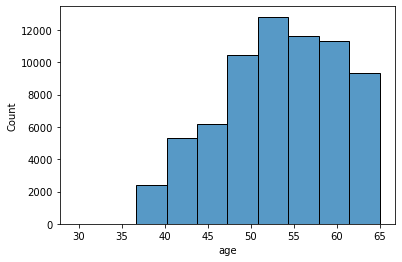

In [25]:
#age
sns.histplot(data=data, x='age',bins=10)
plt.show()

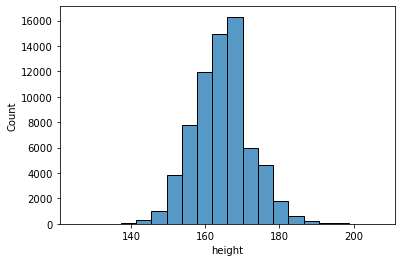

In [26]:
#height
sns.histplot(data=data, x='height',bins=20)
plt.show()

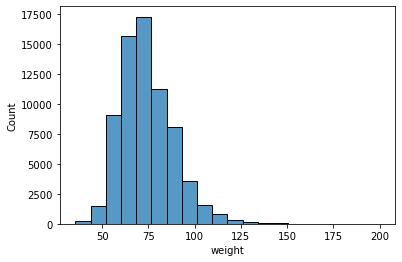

In [27]:
#weight
sns.histplot(data=data, x='weight',bins=20)
plt.show()

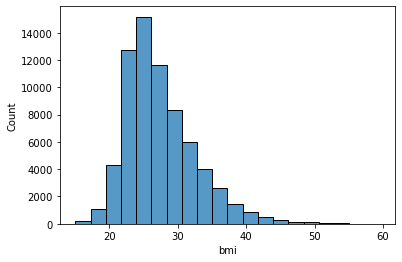

In [28]:
#bmi
sns.histplot(data=data, x='bmi',bins=20)
plt.show()

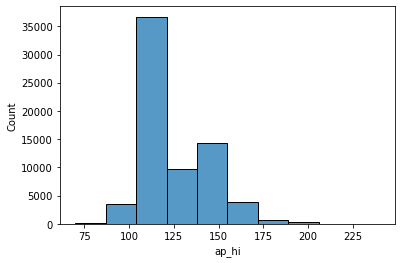

In [29]:
#ap_hi
sns.histplot(data=data, x='ap_hi',bins=10)
plt.show()

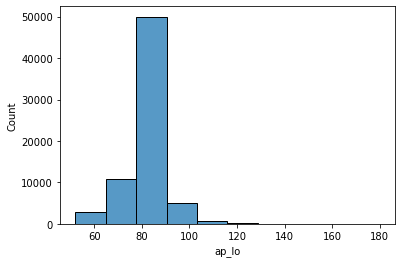

In [30]:
#ap_lo
sns.histplot(data=data, x='ap_lo',bins=10)
plt.show()

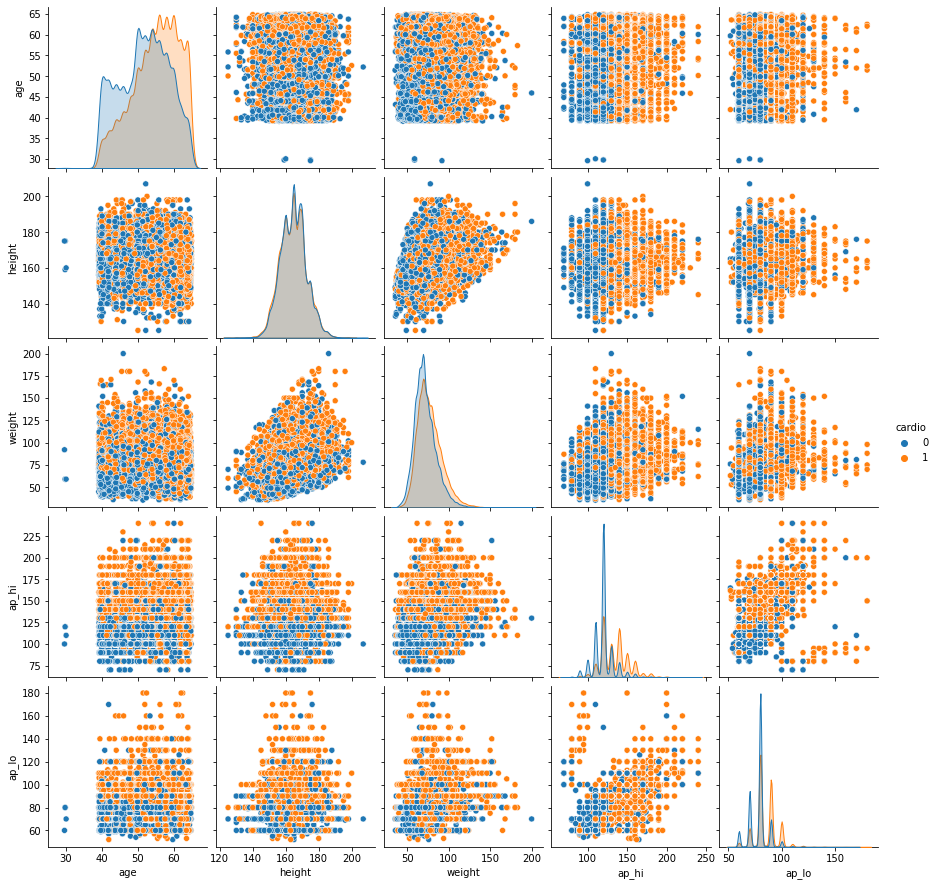

Wall time: 1min 16s


In [33]:
%%time
sns.pairplot(data, vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo'], hue = 'cardio')
plt.show()

#### Checking some scatter plots - visualization of outliers

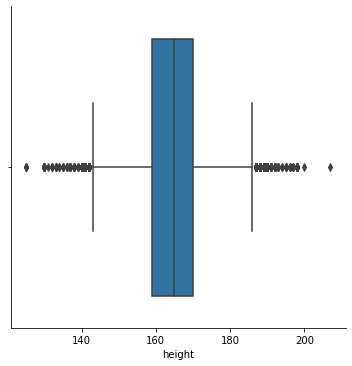

In [31]:
sns.catplot(x='height', kind='box', data=data)
pass

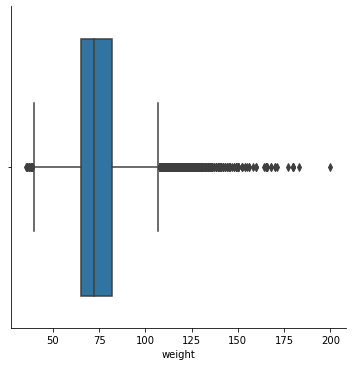

In [178]:
sns.catplot(x='weight', kind='box', data=data)
pass

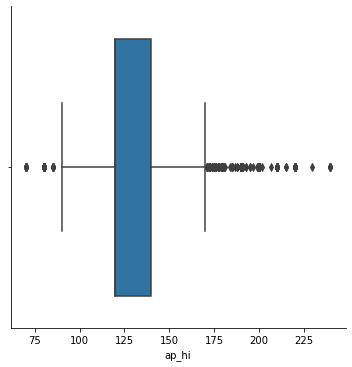

In [179]:
sns.catplot(x='ap_hi', kind='box', data=data)
pass

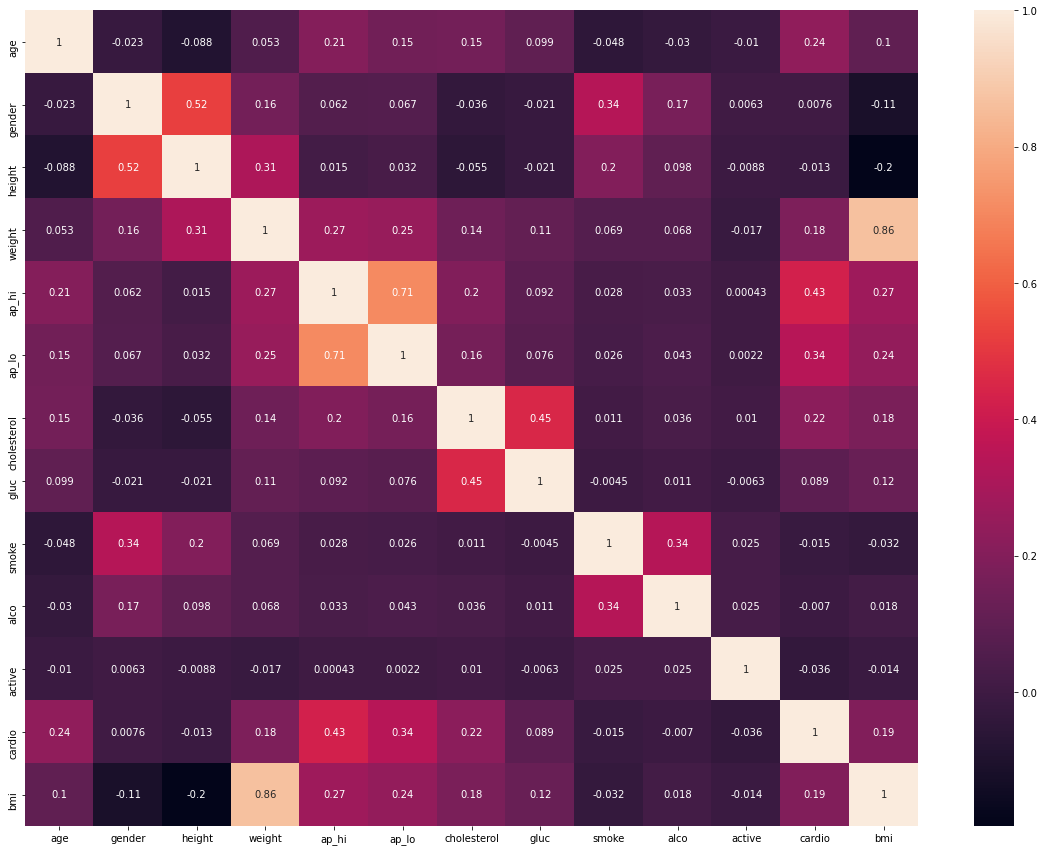

In [27]:
#correlation matrix
plt.subplots(figsize=(20,15))
correlation = data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
pass

### Description of the group

In [59]:
#Distribution by gender
data['gender'].value_counts()
females = data[data['gender'] == 1].shape[0]
females

males = data[data['gender'] == 2].shape[0]
males

print("There are", females, "females and", males, "males.")

There are 45212 females and 24323 males.


In [64]:
#Presence or absence of cardiovascular disease
data['cardio'].value_counts()

had_cardio = data[data['cardio'] == 1].shape[0]
had_cardio

no_cardio = data[data['cardio'] == 0].shape[0]
no_cardio

print("There are {} people who had cardiovascular disease.".format(had_cardio))

There are 34764 people who had cardiovascular disease.


In [77]:
#males and females with or without cardiovascular disease

females_no_cardio = np.logical_and(data['gender']==1,data['cardio']==0).sum()
print(females_no_cardio, "females did not have cardiovascular disease.\n")

females_had_cardio = np.logical_and(data['gender']==1,data['cardio']==1).sum()
print(females_had_cardio, "females had cardiovascular disease.\n")

males_no_cardio = np.logical_and(data['gender']==2,data['cardio']==0).sum()
print(males_no_cardio, "males did not have cardiovascular disease.\n")

males_had_cardio = np.logical_and(data['gender']==2,data['cardio']==1).sum()
print(males_had_cardio, "males had cardiovascular disease.")

22735 females did not have cardiovascular disease.

22477 females had cardiovascular disease.

12036 males did not have cardiovascular disease.

12287 males had cardiovascular disease.


In [28]:
#how many people smoke?
data['smoke'].value_counts()

smoker = data[data['smoke'] == 1].shape[0]
smoker
print("There are {} smokers among respondents.".format(smoker))

There are 6141 smokers among respondents.


In [20]:
df['cardio'].value_counts()

0    34771
1    34764
Name: cardio, dtype: int64